In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import math

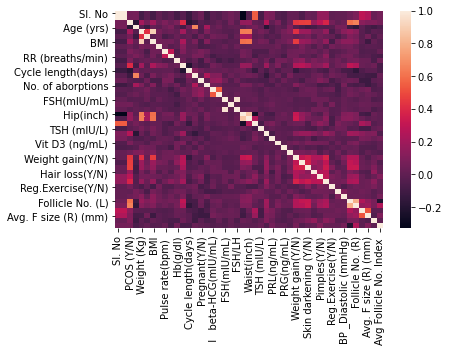

In [2]:
#Retrieve Data

data_full = pd.read_csv('/Users/aminasaleh/Downloads/PCOS_data_without_infertilityV2.csv')


dataFile_hm = sns.heatmap(data_full.corr(), annot = False)

In [3]:
#Clean up Data

data_full = data_full.dropna()

data_full = data_full.drop('Sl. No', axis = 1)
data_full = data_full.drop('Patient File No.', axis = 1)
data_full = data_full.drop('Follicle No. (L)', axis = 1)
data_full = data_full.drop('Follicle No. (R)', axis = 1)

x = data_full.drop(columns = ['Avg Follicle No. Index ']).copy()
y = data_full ['Avg Follicle No. Index ']

x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2, random_state = 42)


In [4]:
#select random seed for consistent results

random.seed(100)
np.random.seed(100)
tf.random.set_seed(100)

In [5]:
#Create Model

model = Sequential()
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')


In [6]:
#Fit the Model

model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 2520.8733
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 1258.0724
Epoch 3/100
14/14 [==============================] - 0s 1ms/step - loss: 1094.8134
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 414.7103
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 253.1996
Epoch 6/100
14/14 [==============================] - 0s 1ms/step - loss: 203.8349
Epoch 7/100
14/14 [==============================] - 0s 1ms/step - loss: 169.4939
Epoch 8/100
14/14 [==============================] - 0s 1ms/step - loss: 317.4720
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 740.1171
Epoch 10/100
14/14 [==============================] - 0s 1ms/step - loss: 529.8187
Epoch 11/100
14/14 [==============================] - 0s 1ms/step - loss: 220.8104
Epoch 12/100
14/14 [==============================] - 0s 1ms/step - loss: 67.1490
Epoch 13/10

In [7]:
#Train the Model

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

4/4 [==============================] - 0s 1ms/step


/Users/aminasaleh/opt/anaconda3/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


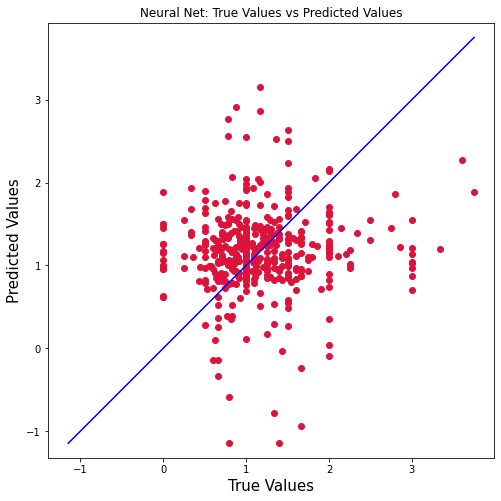

In [8]:
#Create Scatter Plot

plt.figure(figsize=(8,8))
plt.scatter(y_train, y_pred_train, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred_train), max(y_train))
p2 = min(min(y_pred_train), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Neural Net: True Values vs Predicted Values")
plt.axis('equal')
plt.show()

In [9]:
#Calculate RMSE and R2-Scores

r2_train = r2_score(y_train, y_pred_train)
print("R^2 Training: ", r2_train)
r2_test = r2_score(y_test, y_pred_test)
print("R^2 Testing: ", r2_test)
mse_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'RMSE Training: {mse_train}')
mse_test = math.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'RMSE Testing: {mse_test}')

R^2 Training:  -0.5787773008366106
R^2 Testing:  -0.512248404181262
RMSE Training: 0.7589414901816434
RMSE Testing: 0.8691262284011693
